# GIS with Python！！！
## Notebook "Kokusei Chosa" part
- Chomoku LLC: Hideyuki Ogawa
- My twitter([@ogawahideyuki](https://twitter.com/ogawahideyuki))
- Company twitter [@hijichomoku](https://twitter.com/hijichomoku)
- https://chomoku.com/

- Data: Kokusei Chosa (250 meter mesh)
    - Site: [e-Stat Statestics GIS](https://www.e-stat.go.jp/en)
    - data: [2015 Kokusei Chosa 250 meter mesh](https://www.e-stat.go.jp/gis/statmap-search?page=1&type=1&toukeiCode=00200521&toukeiYear=2015&aggregateUnit=Q&serveyId=Q002005112015&statsId=T000876)
    - geo-data: [GIS Data](https://www.e-stat.go.jp/gis/statmap-search?page=1&type=2&aggregateUnitForBoundary=Q)
- Use Data Around Kyoto(5235)
- Marketing with Population Data
    - Under 14
    - Person from abroad

In [1]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal &> /dev/null
# Install rtree - Geopandas requirment
!apt install python3-rtree &> /dev/null
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git &> /dev/null
# Install descartes - Geopandas requirment
!pip install descartes &> /dev/null
!pip install plotly -U &> /dev/null

In [44]:
import folium
import geopandas as gpd
import pandas as pd
import plotly.express as px
import shapely

# Data prepro

In [28]:
# read data
data = pd.read_csv('/content/drive/MyDrive/pyconjp2021/data/kokuse/kyoto/tblT000876Q5235.txt', encoding='shift-jis')
mesh = gpd.read_file('/content/drive/MyDrive/pyconjp2021/data/kokuse/kyoto/MESH05235.shp')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,5,6,28,29) have mixed types.Specify dtype option on import or set low_memory=False.



In [29]:
data.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T000876001,T000876002,T000876003,T000876004,T000876005,T000876006,T000876007,T000876008,T000876009,T000876010,T000876011,T000876012,T000876013,T000876014,T000876015,T000876016,T000876017,T000876018,T000876019,T000876020,T000876021,T000876022,T000876023,T000876024,T000876025,T000876026,T000876027,T000876028,T000876029,T000876030,T000876031,T000876032,T000876033,T000876034,T000876035,T000876036,T000876037,T000876038,T000876039,T000876040,T000876041
0,NaN,NaN,NaN,NaN,人口総数,人口総数 男,人口総数 女,０〜１４歳人口総数,０〜１４歳人口 男,０〜１４歳人口 女,１５歳以上人口総数,１５歳以上人口 男,１５歳以上人口 女,１５〜６４歳人口総数,１５〜６４歳人口 男,１５〜６４歳人口 女,２０歳以上人口総数,２０歳以上人口 男,２０歳以上人口 女,６５歳以上人口総数,６５歳以上人口 男,６５歳以上人口 女,７５歳以上人口総数,７５歳以上人口 男,７５歳以上人口 女,外国人人口総数,外国人人口 男,外国人人口 女,世帯総数,一般世帯数,１人世帯の一般世帯数,２人世帯の一般世帯数,３人世帯の一般世帯数,４人世帯の一般世帯数,５人世帯の一般世帯数,６人世帯の一般世帯数,７人以上世帯の一般世帯数,親族のみの一般世帯数,核家族の一般世帯数,核家族以外の一般世帯数,６歳未満世帯員のいる一般世帯数,６５歳以上世帯員のいる一般世帯数,世帯主の年齢が２０〜２９歳の１人世帯の一般世帯数,高齢単身の一般世帯数,高齢夫婦のみの一般世帯数
1,5.235000e+09,1.0,NaN,5235000012,33,18,15,7,4,3,36,19,17,30,16,14,36,19,17,6,3,3,3,2,1,0,0,0,20,20,12,8,4,1,0,0,0,13,13,0,4,3,5,0,3
2,5.235000e+09,2.0,5.235000e+09,NaN,11,6,5,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,5,5,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
3,5.235000e+09,0.0,NaN,NaN,93,48,45,34,19,15,59,29,30,50,24,26,57,28,29,9,5,4,6,4,2,0,0,0,27,27,2,5,4,12,3,1,0,24,22,2,6,5,0,0,2
4,5.235000e+09,0.0,NaN,NaN,278,135,143,39,18,21,236,115,121,193,95,98,209,103,106,43,20,23,15,7,8,11,5,6,110,110,32,28,18,26,4,2,0,77,69,8,10,27,10,3,9


In [30]:
# make column name
print(data.columns)
print(data.loc[0, :].values)

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T000876001', 'T000876002',
       'T000876003', 'T000876004', 'T000876005', 'T000876006', 'T000876007',
       'T000876008', 'T000876009', 'T000876010', 'T000876011', 'T000876012',
       'T000876013', 'T000876014', 'T000876015', 'T000876016', 'T000876017',
       'T000876018', 'T000876019', 'T000876020', 'T000876021', 'T000876022',
       'T000876023', 'T000876024', 'T000876025', 'T000876026', 'T000876027',
       'T000876028', 'T000876029', 'T000876030', 'T000876031', 'T000876032',
       'T000876033', 'T000876034', 'T000876035', 'T000876036', 'T000876037',
       'T000876038', 'T000876039', 'T000876040', 'T000876041'],
      dtype='object')
[nan nan nan nan '\u3000人口総数' '\u3000人口総数\u3000男' '\u3000人口総数\u3000女'
 '\u3000０〜１４歳人口総数' '\u3000０〜１４歳人口\u3000男' '\u3000０〜１４歳人口\u3000女'
 '\u3000１５歳以上人口総数' '\u3000１５歳以上人口\u3000男' '\u3000１５歳以上人口\u3000女'
 '\u3000１５〜６４歳人口総数' '\u3000１５〜６４歳人口\u3000男' '\u3000１５〜６４歳人口\u3000女'
 '\u3000２０歳以上人口総数' '\u3000２

In [31]:
first = list(data.columns[:4])
second = list(data.loc[0, 'T000876001':])
first.extend(second)
first = [f.strip() for f in first]
data.columns = first
data = data.loc[1:, :]

In [32]:
data.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,人口総数,人口総数 男,人口総数 女,０〜１４歳人口総数,０〜１４歳人口 男,０〜１４歳人口 女,１５歳以上人口総数,１５歳以上人口 男,１５歳以上人口 女,１５〜６４歳人口総数,１５〜６４歳人口 男,１５〜６４歳人口 女,２０歳以上人口総数,２０歳以上人口 男,２０歳以上人口 女,６５歳以上人口総数,６５歳以上人口 男,６５歳以上人口 女,７５歳以上人口総数,７５歳以上人口 男,７５歳以上人口 女,外国人人口総数,外国人人口 男,外国人人口 女,世帯総数,一般世帯数,１人世帯の一般世帯数,２人世帯の一般世帯数,３人世帯の一般世帯数,４人世帯の一般世帯数,５人世帯の一般世帯数,６人世帯の一般世帯数,７人以上世帯の一般世帯数,親族のみの一般世帯数,核家族の一般世帯数,核家族以外の一般世帯数,６歳未満世帯員のいる一般世帯数,６５歳以上世帯員のいる一般世帯数,世帯主の年齢が２０〜２９歳の１人世帯の一般世帯数,高齢単身の一般世帯数,高齢夫婦のみの一般世帯数
1,5.235000e+09,1.0,NaN,5235000012,33,18,15,7,4,3,36,19,17,30,16,14,36,19,17,6,3,3,3,2,1,0,0,0,20,20,12,8,4,1,0,0,0,13,13,0,4,3,5,0,3
2,5.235000e+09,2.0,5.235000e+09,NaN,11,6,5,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,5,5,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
3,5.235000e+09,0.0,NaN,NaN,93,48,45,34,19,15,59,29,30,50,24,26,57,28,29,9,5,4,6,4,2,0,0,0,27,27,2,5,4,12,3,1,0,24,22,2,6,5,0,0,2
4,5.235000e+09,0.0,NaN,NaN,278,135,143,39,18,21,236,115,121,193,95,98,209,103,106,43,20,23,15,7,8,11,5,6,110,110,32,28,18,26,4,2,0,77,69,8,10,27,10,3,9
5,5.235000e+09,0.0,NaN,NaN,110,51,59,18,6,12,89,42,47,81,41,40,79,35,44,8,1,7,4,0,4,4,1,3,44,44,12,13,9,7,2,0,1,31,29,2,8,7,1,1,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35035 entries, 1 to 35035
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   KEY_CODE                  35035 non-null  float64
 1   HTKSYORI                  35035 non-null  float64
 2   HTKSAKI                   6458 non-null   float64
 3   GASSAN                    4525 non-null   object 
 4   人口総数                      35035 non-null  object 
 5   人口総数　男                    35035 non-null  object 
 6   人口総数　女                    35035 non-null  object 
 7   ０〜１４歳人口総数                 35035 non-null  object 
 8   ０〜１４歳人口　男                 35035 non-null  object 
 9   ０〜１４歳人口　女                 35035 non-null  object 
 10  １５歳以上人口総数                 35035 non-null  object 
 11  １５歳以上人口　男                 35035 non-null  object 
 12  １５歳以上人口　女                 35035 non-null  object 
 13  １５〜６４歳人口総数                35035 non-null  object 
 14  １５〜６４歳

In [34]:
mesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,MESH4_ID,MESH5_ID,OBJ_ID,geometry
0,5235000011,5235,00,00,1,1,1,"POLYGON ((135.00312 34.66667, 135.00000 34.666..."
1,5235000012,5235,00,00,1,2,2,"POLYGON ((135.00625 34.66667, 135.00312 34.666..."
2,5235000013,5235,00,00,1,3,3,"POLYGON ((135.00312 34.66875, 135.00000 34.668..."
3,5235000014,5235,00,00,1,4,4,"POLYGON ((135.00625 34.66875, 135.00312 34.668..."
4,5235000021,5235,00,00,2,1,5,"POLYGON ((135.00937 34.66667, 135.00625 34.666..."


In [35]:
data['KEY_CODE'] = data['KEY_CODE'].astype(int)
mesh['KEY_CODE'] = mesh['KEY_CODE'].astype(int)

In [36]:
# Merge data and mesh (key_on = "KEY_CODE")

data1 = mesh.merge(data, on='KEY_CODE')
print(type(data1))
data1.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,MESH4_ID,MESH5_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,人口総数,人口総数 男,人口総数 女,０〜１４歳人口総数,０〜１４歳人口 男,０〜１４歳人口 女,１５歳以上人口総数,１５歳以上人口 男,１５歳以上人口 女,１５〜６４歳人口総数,１５〜６４歳人口 男,１５〜６４歳人口 女,２０歳以上人口総数,２０歳以上人口 男,２０歳以上人口 女,６５歳以上人口総数,６５歳以上人口 男,６５歳以上人口 女,７５歳以上人口総数,７５歳以上人口 男,７５歳以上人口 女,外国人人口総数,外国人人口 男,外国人人口 女,世帯総数,一般世帯数,１人世帯の一般世帯数,２人世帯の一般世帯数,３人世帯の一般世帯数,４人世帯の一般世帯数,５人世帯の一般世帯数,６人世帯の一般世帯数,７人以上世帯の一般世帯数,親族のみの一般世帯数,核家族の一般世帯数,核家族以外の一般世帯数,６歳未満世帯員のいる一般世帯数,６５歳以上世帯員のいる一般世帯数,世帯主の年齢が２０〜２９歳の１人世帯の一般世帯数,高齢単身の一般世帯数,高齢夫婦のみの一般世帯数
0,5235000011,5235,00,00,1,1,1,"POLYGON ((135.00312 34.66667, 135.00000 34.666...",1.0,NaN,5235000012,33,18,15,7,4,3,36,19,17,30,16,14,36,19,17,6,3,3,3,2,1,0,0,0,20,20,12,8,4,1,0,0,0,13,13,0,4,3,5,0,3
1,5235000012,5235,00,00,1,2,2,"POLYGON ((135.00625 34.66667, 135.00312 34.666...",2.0,5.235000e+09,NaN,11,6,5,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,5,5,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
2,5235000013,5235,00,00,1,3,3,"POLYGON ((135.00312 34.66875, 135.00000 34.668...",0.0,NaN,NaN,93,48,45,34,19,15,59,29,30,50,24,26,57,28,29,9,5,4,6,4,2,0,0,0,27,27,2,5,4,12,3,1,0,24,22,2,6,5,0,0,2
3,5235000014,5235,00,00,1,4,4,"POLYGON ((135.00625 34.66875, 135.00312 34.668...",0.0,NaN,NaN,278,135,143,39,18,21,236,115,121,193,95,98,209,103,106,43,20,23,15,7,8,11,5,6,110,110,32,28,18,26,4,2,0,77,69,8,10,27,10,3,9
4,5235000021,5235,00,00,2,1,5,"POLYGON ((135.00937 34.66667, 135.00625 34.666...",0.0,NaN,NaN,110,51,59,18,6,12,89,42,47,81,41,40,79,35,44,8,1,7,4,0,4,4,1,3,44,44,12,13,9,7,2,0,1,31,29,2,8,7,1,1,0


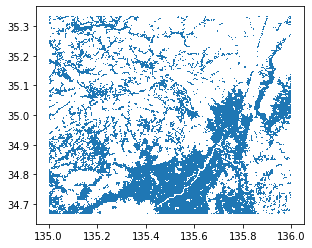

In [37]:
# plot
data1.plot()

In [62]:
# data area
# 対象地域
data_all = shapely.geometry.MultiPolygon(data1.geometry.values)
area_bounds = data_all.bounds
box = shapely.geometry.box(area_bounds[0], area_bounds[1], area_bounds[2], area_bounds[3])

map = folium.Map([data_all.centroid.y, data_all.centroid.x], zoom_start=8)
folium.GeoJson(box).add_to(map)
map

In [38]:
data1.crs

<Geographic 2D CRS: EPSG:4612>
Name: JGD2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan - onshore and offshore.
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [105]:
# replace abnormal data and change data type
data1 = data1.replace('*', 0)
data1.loc[:, '人口総数':] = data1.loc[:, '人口総数':].astype(int)

TypeError: ignored

## Analyze data
- but today we will not.

In [97]:
data1 = gpd.read_file('/content/drive/MyDrive/pyconjp2021/data/kokuse/kyoto/kokuse_kyoto_2015.geojson')

In [98]:
# calc ratio
data1['young_ratio_count'] = data1['０〜１４歳人口総数'] / data1['人口総数']

In [99]:
# Watch Data
px.scatter(data1, x='人口総数', y='０〜１４歳人口総数', marginal_x='violin', marginal_y='violin', trendline='ols')

In [100]:
data2 = data1.query('young_ratio_count < 1')
px.scatter(data2, x='人口総数', y='young_ratio_count', marginal_x='violin', marginal_y='violin')

- looking for over 300 or 40% in area.(Under 14)

In [101]:
over300 = data1[data1['０〜１４歳人口総数'] > 300]
ratio40 = data1[data1['young_ratio_count'] > 0.4]

In [102]:
print(over300.shape)
print(over40.shape)

(171, 53)
(285, 53)


In [103]:
over300.crs

<Geographic 2D CRS: EPSG:4612>
Name: JGD2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan - onshore and offshore.
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [104]:
center = shapely.geometry.MultiPolygon(over300.geometry.values).centroid

map = folium.Map([center.y, center.x],
                 #tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
                 #attr='google map'
                 tiles='Stamen Toner'
                 )

# folium.Choropleth(geo_data=over300, data=over300, columns=['KEY_CODE', '０〜１４歳人口総数'],
#                 key_on='feature.properties.KEY_CODE', fill_color='OrRd', name='total').add_to(map)

folium.GeoJson(
    over300, 
    tooltip=folium.features.GeoJsonTooltip(fields=["KEY_CODE", "人口総数", "０〜１４歳人口総数"]),
    style_function = lambda x: {'color': 'red'},
    name='labels'

).add_to(map)

folium.LayerControl().add_to(map)
map

In [106]:
center = shapely.geometry.MultiPolygon(ratio40.geometry.values).centroid

map = folium.Map([center.y, center.x],
                 #tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
                 #attr='google map'
                 tiles='Stamen Toner'
                 )

folium.Choropleth(geo_data=ratio40, data=ratio40, columns=['KEY_CODE', 'young_ratio_count'],
                key_on='feature.properties.KEY_CODE', fill_color='OrRd', name='total').add_to(map)

folium.GeoJson(
    ratio40, 
    tooltip=folium.features.GeoJsonTooltip(fields=["KEY_CODE", "人口総数", "０〜１４歳人口総数"]),
    style_function = lambda x: {'color': 'red'},
    name='labels'

).add_to(map)

folium.LayerControl().add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

- Filter with Population(ratio)
    - It is inefficient

In [107]:
ratio40_over100 = ratio40.query('人口総数 > 100')
ratio40_over100.shape

(46, 53)

In [108]:
center = shapely.geometry.MultiPolygon(ratio40.geometry.values).centroid

map = folium.Map([center.y, center.x],tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',attr='google map')

folium.Choropleth(geo_data=ratio40_over100, data=ratio40_over100, columns=['KEY_CODE', '０〜１４歳人口総数'],
                key_on='feature.properties.KEY_CODE', fill_color='OrRd', name='total').add_to(map)

folium.GeoJson(
    ratio40_over100, 
    tooltip=folium.features.GeoJsonTooltip(fields=["KEY_CODE", "人口総数", "０〜１４歳人口総数"]),
    style_function = lambda x: {'color': 'red'},
    name='labels'

).add_to(map)

folium.LayerControl().add_to(map)
map

- Find an area with many foreign residents.

In [123]:
# 近くにいる人数が少ない方の方が困ってそう
# 1人から10人以下の地域を探す
pfa = data1.query('0 < 外国人人口総数 < 10')
pfa = pfa.set_crs('EPSG:4326')
pfa.shape

(11320, 53)

In [124]:
pfa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [125]:
pfa_map = pfa[['外国人人口総数', '人口総数', 'geometry', 'KEY_CODE']]

center = shapely.geometry.MultiPolygon(pfa_map.geometry.values).centroid

map = folium.Map([center.y, center.x],tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',attr='google map')

folium.Choropleth(geo_data=pfa_map, data=pfa_map, columns=['KEY_CODE', '外国人人口総数'],
                key_on='feature.properties.KEY_CODE', fill_color='OrRd', name='total').add_to(map)

folium.GeoJson(
    pfa_map, 
    tooltip=folium.features.GeoJsonTooltip(fields=["KEY_CODE", "人口総数", "外国人人口総数"]),
    style_function = lambda x: {'color': 'red'},
    name='labels'

).add_to(map)

folium.LayerControl().add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

In [119]:
pfa = data1.query('外国人人口総数 > 10')
pfa = pfa.set_crs('EPSG:4326')

In [120]:
pfa_map = pfa[['外国人人口総数', '人口総数', 'geometry', 'KEY_CODE']]

center = shapely.geometry.MultiPolygon(pfa_map.geometry.values).centroid

map = folium.Map([center.y, center.x],tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',attr='google map')

folium.Choropleth(geo_data=pfa_map, data=pfa_map, columns=['KEY_CODE', '外国人人口総数'],
                key_on='feature.properties.KEY_CODE', fill_color='OrRd', name='total').add_to(map)

folium.GeoJson(
    pfa_map, 
    tooltip=folium.features.GeoJsonTooltip(fields=["KEY_CODE", "人口総数", "外国人人口総数"]),
    style_function = lambda x: {'color': 'red'},
    name='labels'

).add_to(map)

folium.LayerControl().add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.